Intro:

The metric we are using for this data set is:

What neighborhood would be best for surviving the Last of Us?

The submetric I'm introducing is air quality

https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/4ab1e23f-3262-4bd3-adbf-f72f0119108b 

Because Cordyceps virus spreads through a fungal infection. Air quality is a good indicator of who gets effected the most. so using daily air quality data from the last few years allows us to see what neighhborhoods would be effected the most. This dataset covers daily AQI for the last ~7 years.


In [2]:
import pandas as pd
%matplotlib inline
data = pd.read_csv("airquality.csv", index_col="date", parse_dates=True)

#Looking at the csv we can see that the important columns are site, date, and index_value which is positively correlated with how bad the airquality in a given neighborhood is.
#Heatlh_advisory and health_effects are descriptive columns that are hard to show so they will be removed. Parameter will also be removed for simplicity sake as each code means a different thing.

data2 = data.drop(['parameter', 'health_advisory', 'health_effects', 'description'], axis = 1)

#To avoid any mixups with graphing later on, I'm storing the pivot table in a new value
data3 = data2.pivot_table(index = 'date', columns = 'site', values = 'index_value')

data3.head(10)
#This table still contains a lot of NaN values so now we need to find a way to replace all of them without it impacting the data set.
#If we replace all of the NaN values with 0, it will schew the data based on which neighborhoods have more NaNs in the data. 



site,Avalon,Clairton,Flag Plaza,Glassport High Street,Harrison Township,Lawrenceville,Lawrenceville 2,Liberty,Liberty 2,Lincoln,North Braddock,Parkway East,Pittsburgh,South Fayette,West Mifflin
date,,,,,,,,,,,,,,,
2016-01-01,10.0,NaN,3.5,6.0,17.0,28.0,1.5,3.0,17.0,23.0,6.5,13.333333,NaN,3.0,NaN
2016-01-02,56.0,NaN,3.5,6.0,20.0,30.5,3.5,23.0,25.0,35.0,11.5,17.000000,NaN,3.0,NaN
2016-01-03,40.0,NaN,3.0,6.0,16.5,31.5,2.5,20.0,21.5,29.0,11.5,18.333333,NaN,3.0,NaN
2016-01-04,1.0,NaN,6.0,6.0,17.5,24.5,1.5,0.0,14.0,13.5,6.0,12.666667,NaN,4.0,NaN
2016-01-05,21.0,NaN,10.0,9.0,23.0,35.5,17.0,21.0,27.5,34.0,22.0,26.666667,NaN,11.0,NaN
2016-01-06,6.0,NaN,21.0,46.0,23.5,40.0,10.5,36.0,83.5,104.5,30.5,32.666667,NaN,10.0,NaN
2016-01-07,4.0,NaN,25.0,57.0,24.5,37.5,9.5,31.0,63.0,95.0,50.5,42.000000,NaN,9.0,NaN
2016-01-08,4.0,NaN,25.0,32.0,16.5,37.0,7.5,13.0,52.0,77.0,37.0,35.333333,NaN,11.0,NaN
2016-01-09,1.0,NaN,18.0,36.0,23.5,31.0,6.0,26.0,39.0,44.0,31.5,22.000000,NaN,0.0,NaN


Using Data From https://air.plumelabs.com/air-quality-in-Pittsburgh-pa-lQpR 

The average annual AQI for all of Pittsburgh is about 23. Therefore if we substitute it in for all the NaN values, the general trend of the data will still be intact with (minimal) schew

<Axes: xlabel='site'>

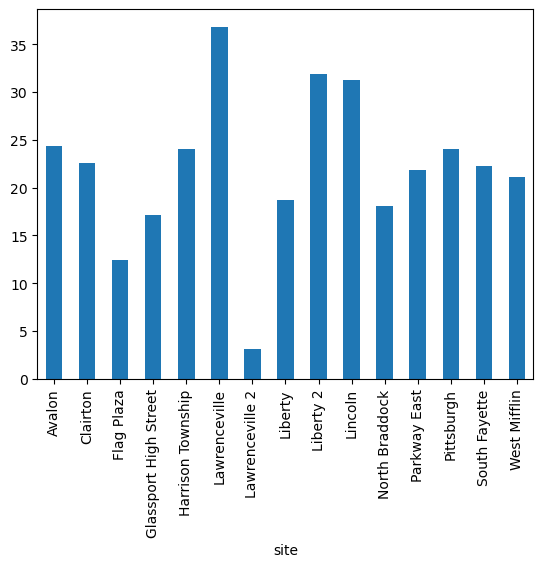

In [4]:
data3 = data3.fillna(23)
#Now that the NaN values have been dealt with we can start to analyze this data and see the trends we will find


data3.mean().plot(kind='bar')

Based off the graph, it would be easy to conclude that Lawrenceville 2 is the best neighborhood based on air quality. However, because of the large descrepancy we should analyze this further as well.

In [3]:
data3.describe()


site,Avalon,Clairton,Flag Plaza,Glassport High Street,Harrison Township,Lawrenceville,Lawrenceville 2,Liberty,Liberty 2,Lincoln,North Braddock,Parkway East,Pittsburgh,South Fayette,West Mifflin
count,2633.000000,696.000000,2249.000000,2636.000000,2653.000000,2649.000000,2641.000000,2650.000000,2649.000000,1830.000000,2649.000000,2653.000000,828.000000,2653.000000,301.000000
mean,24.376187,21.254310,10.486661,17.066009,24.076329,36.844847,3.066263,18.711698,31.943186,34.968852,18.087863,21.846337,26.349436,22.220505,6.335548
std,14.836970,17.738467,6.335522,10.356538,8.149927,11.885051,1.883682,19.631560,16.370120,15.851445,11.169512,7.875831,10.289061,10.434689,7.178930
min,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,3.000000,4.000000,0.000000,5.000000,5.000000,0.000000,0.000000
25%,14.500000,3.000000,6.500000,9.000000,19.000000,29.000000,2.000000,3.000000,19.000000,23.000000,10.000000,16.000000,19.000000,16.500000,1.000000
50%,22.000000,20.000000,9.000000,15.000000,23.500000,35.500000,2.500000,13.000000,29.000000,33.000000,15.500000,21.000000,24.833333,21.000000,4.000000
75%,31.000000,34.000000,12.500000,22.000000,28.500000,43.500000,4.000000,29.000000,41.500000,44.000000,23.000000,26.666667,32.500000,26.000000,9.000000
max,115.000000,83.000000,50.000000,82.000000,64.500000,100.000000,18.000000,137.000000,112.000000,119.000000,78.000000,66.000000,92.000000,97.000000,44.000000


From this data we can conclude that Lawrenceville 2 with standard deviations included remains as the neighborhood with the lowest AQI over the last 7 years. Some further research into Lawrenceville noted that it is often subdivided into 3 neighborhoods due to size (Upper, Central, Outer). This data set only divides Lawrenceville into two subdistricts. I think it is safest to conclude that Lawrenceville 2 would mostly consist of Upper Lawrenceville as it has the furthest proximity from the city of Pittsburgh (which should in turn reduce the air pollution).

Conclusion: Lawrenceville 2 is most likely to survive the Last of Us based off the air quality as a submetric. But based off some of the unclear aspects of the data Flag Plaza should be regarded as a close second depending on how the other analyze go.